# Lecture 11: thyroid example

In [18]:
print('test')

test


In [19]:
!pip install scikit-learn
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [20]:
# import 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import numbers
import matplotlib.pyplot as plt

In [21]:
# load dataset
thyroid_df = pd.read_csv('thyroid_data.csv')

# loook at shape
thyroid_df.shape

(383, 17)

In [22]:
# look at the dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [23]:
# look at data on recurrance 
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [24]:
# define list of column name to one hot encode
cols_to_exclude = ['Age', 'Recurred']

cat_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]
cat_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [25]:
# define the one hot encoding destination
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough'
)

In [26]:
# apply the transformer
transform_data = column_transformer.fit_transform(thyroid_df)

transform_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [27]:
# get the list of column names

encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(cat_cols)
encoded_cols

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [28]:


transfomed_df = pd.DataFrame(transform_data)

transfomed_df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [29]:
# rename 55 to recurred
transfomed_df = transfomed_df.rename(columns={55: 'Recurred'})
transfomed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [30]:
# create X and y variables
X = transfomed_df.drop('Recurred', axis=1)
y = transfomed_df['Recurred']
X.head()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62


In [31]:
# convert to a lists
encoded_cols = list(encoded_cols)

encoded_cols.append('Age')

encoded_cols


['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [33]:
transfomed_df = pd.DataFrame(columns=encoded_cols)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [36]:
X_train.shape

(283, 55)

In [ ]:
# define the paremeter grid
param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [30, 60, 90]
}

In [39]:
# make the random forest classifier
rf_classifier = RandomForestClassifier()

# make the grid object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')



In [56]:
# run the gridsearch
grid_search.fit(X_train,y_train)

beat_params = grid_search.best_params_
best_params2 = grid_search.best_params_

print(beat_params)
print(best_params2)


{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 60}


In [57]:
best_score = grid_search.best_score_
best_score

np.float64(0.961142742982719)

In [62]:
final_model = RandomForestClassifier(
    class_weight= 'balanced',
    criterion='entropy',
    max_depth= 8,
    max_features='sqrt',
    n_estimators=60
)
final_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, n_estimators=60)

In [63]:
final_model.score(X_test, y_test)

0.97

In [69]:
# get feature importance
feature_importances = final_model.feature_importances_

feature_importances

array([1.14333820e-02, 1.53624366e-02, 5.78208289e-03, 7.16938709e-03,
       1.67598285e-03, 3.88916236e-03, 3.29525976e-04, 1.29135384e-18,
       2.06512950e-03, 1.78583776e-04, 6.27313451e-03, 4.86408100e-05,
       2.99757309e-03, 0.00000000e+00, 1.00935691e-02, 4.55768189e-04,
       6.38631807e-03, 8.57452167e-03, 1.00036352e-02, 6.32730733e-04,
       5.68715903e-03, 5.01561998e-02, 6.82157889e-19, 1.52139052e-02,
       4.15663158e-03, 3.15547746e-03, 2.22625117e-03, 3.99499408e-03,
       1.86816117e-02, 2.22729949e-02, 3.44038976e-02, 3.66563967e-02,
       8.11997807e-02, 2.38860578e-03, 5.53864721e-03, 1.38725629e-02,
       7.92715871e-03, 1.04041845e-02, 7.01334418e-03, 1.26424476e-03,
       3.50062460e-02, 8.59170757e-03, 4.11368651e-02, 2.19385960e-03,
       6.31736744e-03, 2.09675472e-02, 2.28227529e-03, 6.91074301e-19,
       2.40879021e-03, 8.72165294e-04, 1.53794285e-02, 1.62581468e-01,
       2.43658184e-02, 2.12862006e-01, 4.54688433e-02])

In [79]:
#convert to dataframe
feature_importances_df = pd.DataFrame({'feature': X.columns,
                                      'importance': feature_importances})

#sort
feature_importances_df['feature'] = encoded_cols
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

<Axes: xlabel='feature'>

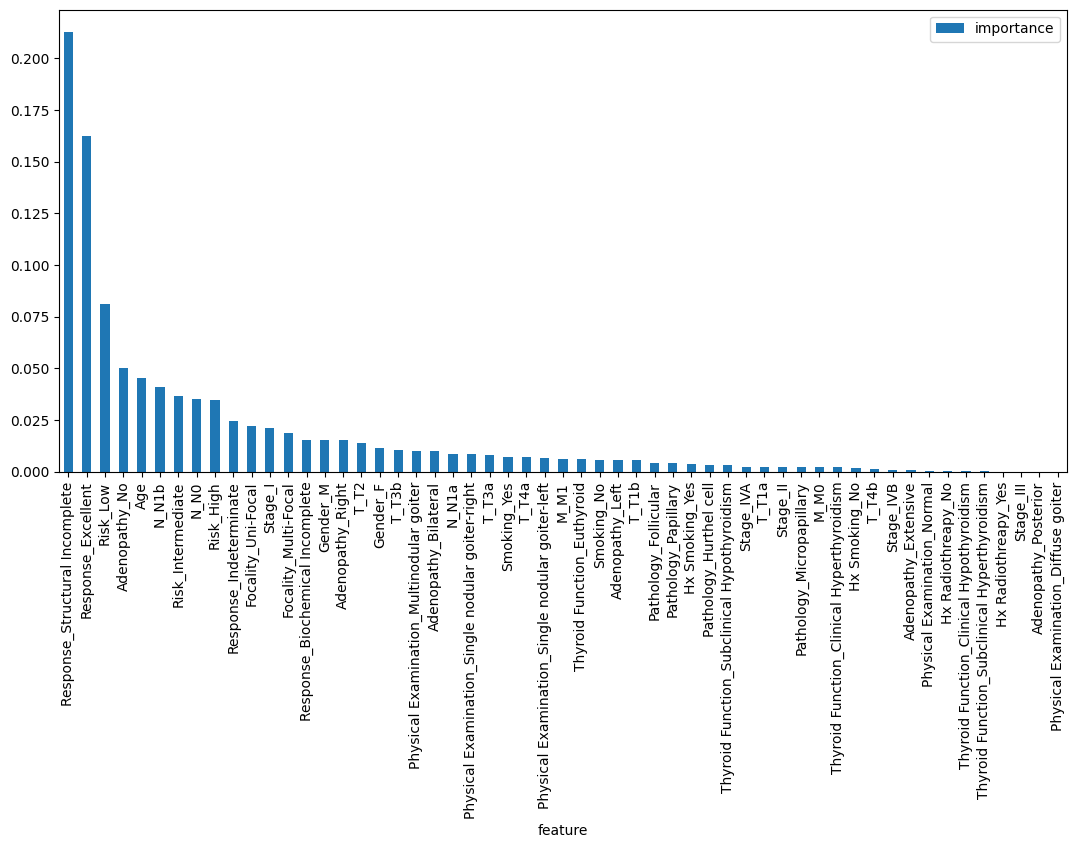

In [80]:
feature_importances_df.plot.bar(x='feature', y='importance', figsize=(13,6))